In [1]:
#MNIST DATASET
#import neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
#load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
#load the MNIST DATASET
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

#reshape the data for cnn
X_train_cnn = x_train.reshape(-1,28,28,1)
x_test_cnn = x_test.reshape(-1,28,28,1)
#one-hot encoding for cnn in data
y_train_oh = to_categorical(y_train,10)
y_test_oh = to_categorical(y_test,10)

#build an ANN model

ann_model = Sequential([
    Flatten(input_shape=(28,28)),

#first hidden layer
Dense(128, activation= 'relu'),

#second hidden layer
Dense(64, activation= 'relu'),

Dense(10, activation= 'softmax'),
])
#compile the model

ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train ANN model
ann_model.fit(x_train,y_train_oh,epochs=5, batch_size=32, validation_data=(x_test,y_test_oh))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8766 - loss: 0.4251 - val_accuracy: 0.9652 - val_loss: 0.1197
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9676 - loss: 0.1085 - val_accuracy: 0.9728 - val_loss: 0.0859
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9792 - loss: 0.0687 - val_accuracy: 0.9728 - val_loss: 0.0867
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9831 - loss: 0.0522 - val_accuracy: 0.9768 - val_loss: 0.0745
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9879 - loss: 0.0385 - val_accuracy: 0.9726 - val_loss: 0.0954


In [3]:
# Build the CNN model
cnn_model = Sequential([
    # First convolutional layer
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    # Pool layer
    MaxPooling2D((2,2)),
    # Second convolutional layer and pool layer
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    # Flatten the features to 1-dimensional vector
    Flatten(),
    # Fully connected layer
    Dense(64, activation='relu'),
    # Output layer
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, y_train_oh, epochs=5, batch_size=32, validation_data=(x_test_cnn, y_test_oh))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.8963 - loss: 0.3338 - val_accuracy: 0.9837 - val_loss: 0.0532
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9841 - loss: 0.0506 - val_accuracy: 0.9890 - val_loss: 0.0339
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9897 - loss: 0.0321 - val_accuracy: 0.9886 - val_loss: 0.0330
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9918 - loss: 0.0244 - val_accuracy: 0.9882 - val_loss: 0.0359
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 34ms/step - accuracy: 0.9946 - loss: 0.0168 - val_accuracy: 0.9908 - val_loss: 0.0305


In [4]:
#build the model with KNN
x_train_knn = x_train.reshape(-1,28*28)
x_test_knn = x_test.reshape(-1,28*28)

#standardization of the data
scalaer = StandardScaler()
x_train_knn = scalaer.fit_transform(x_train_knn)
x_test_knn = scalaer.transform(x_test_knn)

#create the model
knn_model = KNeighborsClassifier(n_neighbors=3)

#train the model
knn_model.fit(x_train_knn, y_train)

knn_accuracy = knn_model.score(x_test_knn, y_test)
print(f"KNN Accuracy: {knn_accuracy*100:.2f}%")


KNN Accuracy: 94.52%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


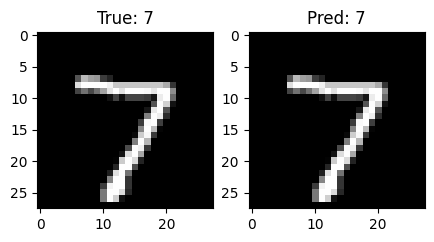

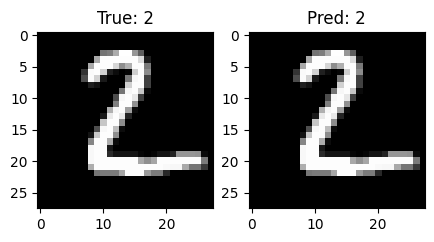

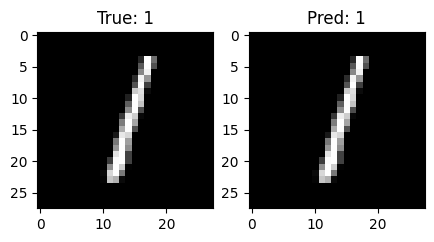

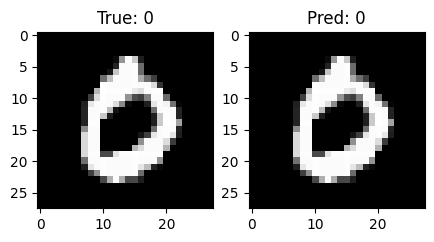

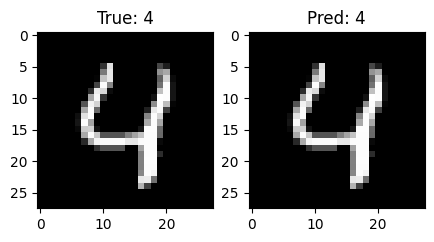

In [5]:
# Make predictions with the ANN model
predictions = ann_model.predict(x_test_cnn)

for i in range(5):
    plt.figure(figsize=(5, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"True: {np.argmax(y_test_oh[i])}")
    plt.imshow(x_test_cnn[i], cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.imshow(x_test_cnn[i], cmap='gray')

    plt.show()